# Linear Regression

![](img/linear_regression.png "Text to show on mouseover")

A Linear regression is a ML model with a hipothesis function of the form $h_\theta(x) = \theta_0 + \theta_1 x$, where $\theta$ are the model parameters to be found, such that the cost function (MSE) is minimum.

In [67]:
# Importing

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Plotting parameters

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

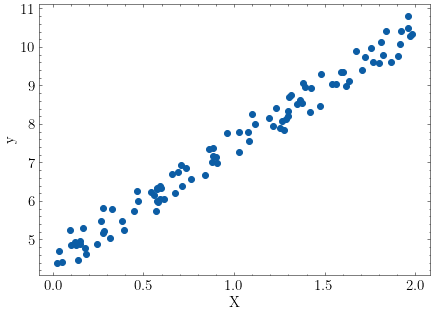

In [68]:
# Generating data

X = 2* np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Normal Equation (Exact solution)

In [69]:
# Normal equation

class NormalLinearRegression:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        X_b = np.c_[(np.ones((X.shape[0], X.shape[1])), X)]
        self.theta_ = np.linalg.inv(X_b.T@X_b)@X_b.T@y
        return self
    
    def predict(self, X):
        X_b = np.c_[(np.ones((X.shape[0], X.shape[1])), X)]
        return X_b @ self.theta_

In [70]:
# Our parameters estimations is pretty close from the original  parameters
lin_reg = NormalLinearRegression()
lin_reg.fit(X, y)
print(lin_reg.theta_)

[[4.46233752]
 [3.00778195]]


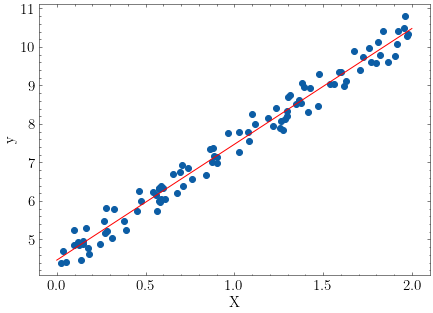

In [71]:
# Lets predict two points at the extremes to make a line plot
X_new = np.array([[0],
                  [2]])

y_pred = lin_reg.predict(X_new)

# Plot
plt.scatter(X, y, label='Data')
plt.plot(X_new, y_pred, c='r', label='Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

This method doesn't work if $X^T X$ is singular. In practice, sklearn uses SVD to compute a pseudo inverse which is faster and more reliable.

In [72]:
# Comparing sklearn with our implementation

sk_lin_reg = LinearRegression()
sk_lin_reg.fit(X, y)

y_sk = sk_lin_reg.predict(X)
y_frank = lin_reg.predict(X)

In [73]:
print('Sklearn')
print(f'MSE: {mean_squared_error(y, y_sk):.2f}')
print(f'R2: {r2_score(y, y_sk):.2f}')

Sklearn
MSE: 0.07
R2: 0.98


In [74]:
print('Frank')
print(f'MSE: {mean_squared_error(y, y_frank):.2f}')
print(f'R2: {r2_score(y, y_frank):.2f}')

Frank
MSE: 0.07
R2: 0.98


## Batch Gradient Descent

The Batch Gradient Descent consists in initialize our model parameters randomly and move towards a minimum MSE by subtracting the gradient at the actual point using all instances.

In [75]:
# Gradient Descent

class SGDLinearRegression:
    def __init__(self, eta=0.1, max_iter=1000, tol=1e-3):
        self.eta = eta
        self.max_iter = max_iter
        self.tol = tol
        
    def fit(self, X, y):
        m_ = X.shape[0]
        n_ = X.shape[1]
        X_b_ = np.c_[np.ones(m_), X]
        self.theta_ = np.random.rand(n_ + 1)
        
        for i in range(self.max_iter):
            grad = (2/m_) * X_b_.T @ (X_b_ @ self.theta_ - y.ravel()) 
            self.theta_ = self.theta_ - self.eta*(grad)
            if np.linalg.norm(grad) < self.tol:
                self.i_ = i+1
                break
        
        return self
    
    def predict(self, X):
        X_b = np.c_[(np.ones((X.shape[0], X.shape[1])), X)]
        return X_b @ self.theta_

In [76]:
sgd_frank = SGDLinearRegression()
sgd_frank.fit(X, y)
sgd_frank.theta_

array([4.46013726, 3.00966352])